# What is Facebook Prophet?

- Prophet is an open-source forecasting procedure which is available in R and Python programming language.
- It is said that it is fast and provides completely automated forecasts that can be tuned by hand.
- Prophet is open source software released by Facebook’s Core Data Science team.


# In which cases is Facebook Prophet useful?

- Time series data analysis (trends with yearly/weekly/daily/seasonality/holiday)

# Math behind Facebook Prophet

"We use a decomposable time series model (Harvey & Peters 1990) with three main model components: trend, seasonality, and holidays. They are combined in the following equation:"

$ y(t) = g(t) + s(t) + h(t) + \epsilon_t $

Where:
- g(t) is the trend function which models non-periodic changes in the value of the time series
- s(t) represents periodic changes (weekly/yearly seasonality)
- h(t) represents the effects of holidays which occur on potentially irregular schedules over one or more days
- The error term epsilon t represents any idiosyncratic changes which are not accommodated by the model; later we will make the parametric assumption that epsilon t is normally distributed.

"This specification is similar to a generalized additive model (GAM) (Hastie & Tibshirani 1987), a class of regression models with potentially non-linear smoothers applied to the regressors."

## The Trend Model

There are two models implemented for the trend:
- Saturating growth model
- Piecewise linear model

The first one looks like this:

$g(t) = C/(1+exp(-k(t-m))$

Where: C - carrying capacity, k - growth rate, m - offset parameter

The linear model looks like this:

$g(t) = (k+a(t)^t*delta)*t+(m-a(t)^T*gamma$

Where: k - growth rate, delta - rate of adjustment, m - offset parameter, gamma is set to -sjdeltaj to make the function continuous

# Implement Prophet in Python and analyze the provided data (run basic model and plot results).

In [2]:
# Python
import pandas as pd
from prophet import Prophet

In [3]:
# Python
df = pd.read_csv('data.csv')
df.head()

date  cases  deaths
0  2020-01-21      1       0
1  2020-01-22      1       0
2  2020-01-23      1       0
3  2020-01-24      2       0
4  2020-01-25      3       0

In [4]:
df1 = pd.DataFrame()
df1['ds'] = df['date'].copy()
df1['y'] = df['deaths'].copy()

df1.head()

ds  y
0  2020-01-21  0
1  2020-01-22  0
2  2020-01-23  0
3  2020-01-24  0
4  2020-01-25  0

In [5]:
# Python
m = Prophet()
m.fit(df1)

19:49:48 - cmdstanpy - INFO - Chain [1] start processing
19:49:49 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

ds
1447 2024-01-07
1448 2024-01-08
1449 2024-01-09
1450 2024-01-10
1451 2024-01-11

In [7]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat     yhat_lower    yhat_upper
1447 2024-01-07  1.291119e+06  711338.242412  1.936759e+06
1448 2024-01-08  1.291508e+06  709370.401076  1.938612e+06
1449 2024-01-09  1.292399e+06  707408.572660  1.939941e+06
1450 2024-01-10  1.293548e+06  708125.497844  1.941557e+06
1451 2024-01-11  1.294569e+06  707719.604552  1.947328e+06

In [8]:
fig1 = m.plot(forecast)

C:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


C:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series cont

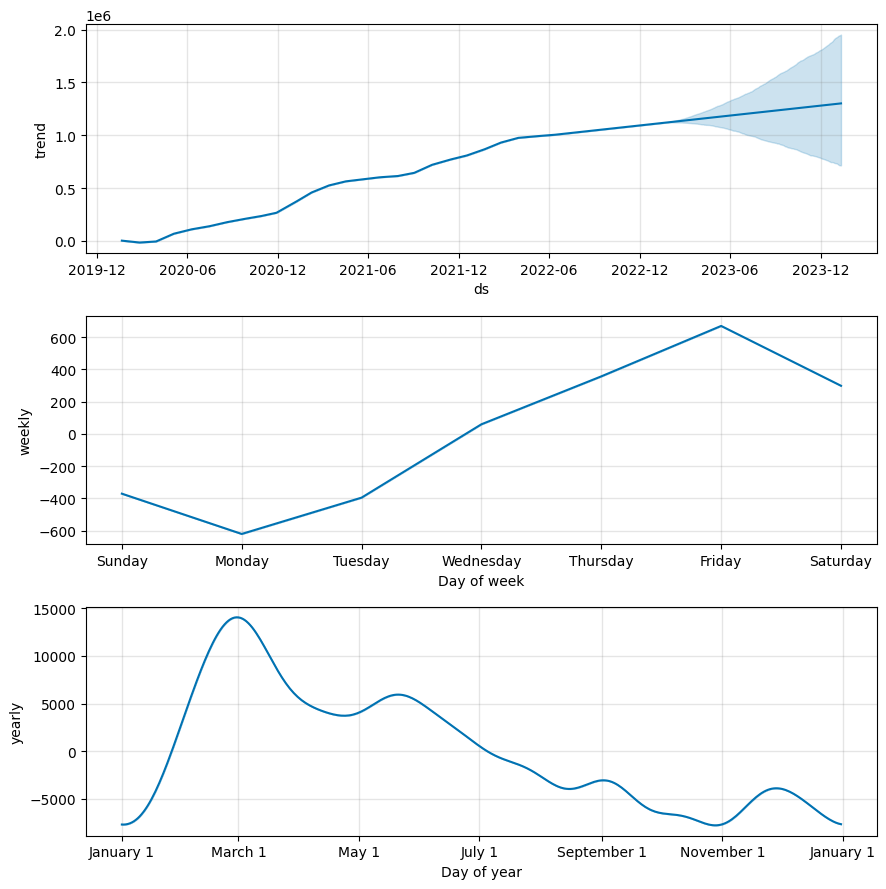

In [9]:
fig2 = m.plot_components(forecast)

In [10]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [11]:
plot_components_plotly(m, forecast)

In [12]:
df2 = pd.DataFrame()
df2['ds'] = df['date'].copy()
df2['y'] = df['cases'].copy()

df2.head()

ds  y
0  2020-01-21  1
1  2020-01-22  1
2  2020-01-23  1
3  2020-01-24  2
4  2020-01-25  3

In [14]:
m2 = Prophet()
m2.fit(df2)

19:52:06 - cmdstanpy - INFO - Chain [1] start processing
19:52:07 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future2 = m2.make_future_dataframe(periods=365)
future2.tail()

ds
1447 2024-01-07
1448 2024-01-08
1449 2024-01-09
1450 2024-01-10
1451 2024-01-11

In [16]:
forecast2 = m2.predict(future)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1447 2024-01-07  1.414373e+08  5.897317e+07  2.238828e+08
1448 2024-01-08  1.417986e+08  5.905308e+07  2.243865e+08
1449 2024-01-09  1.421809e+08  5.936014e+07  2.250721e+08
1450 2024-01-10  1.425902e+08  5.922332e+07  2.258386e+08
1451 2024-01-11  1.430242e+08  5.944531e+07  2.265603e+08

C:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



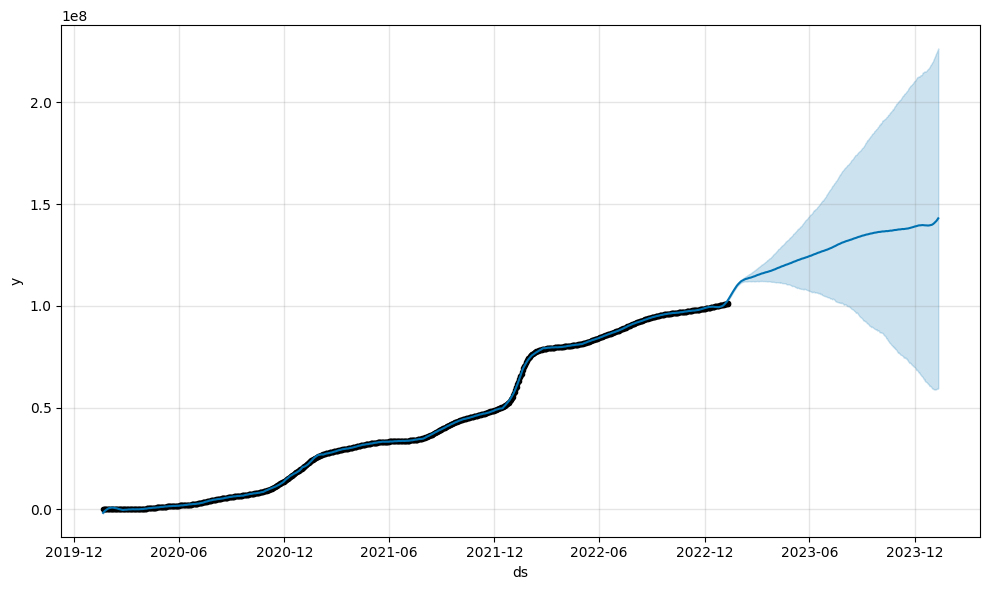

In [18]:
fig12 = m2.plot(forecast2)

In [19]:
fig22 = m2.plot_components(forecast2)

C:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

In [20]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m2, forecast2)

In [21]:
plot_components_plotly(m2, forecast2)